In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

In [3]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.shape

(303, 14)

In [7]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

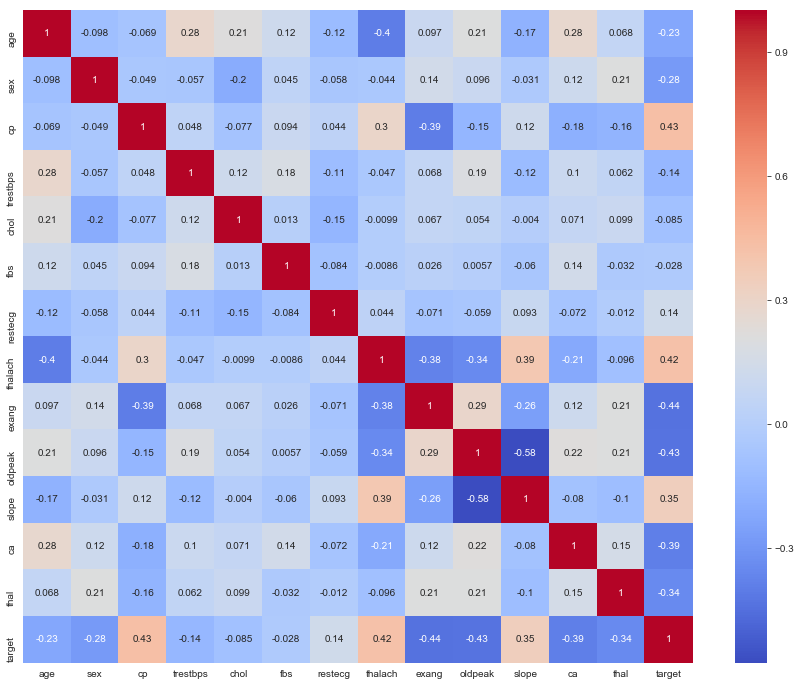

In [30]:
#checking correlation of each feature

plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True)

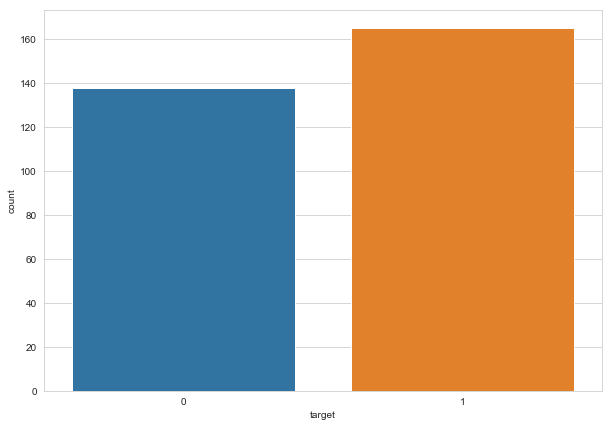

In [32]:
plt.figure(figsize=(10,7))
sns.set_style('whitegrid')
sns.countplot('target', data=df)

* It's look like a balanced dataset.

# Data Preprocessing

In [10]:
dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = scaler.fit_transform(dataset[columns_to_scale])

In [12]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


In [13]:
X = dataset.drop('target', axis = 1)

y = df['target']

# Split dataset into train and test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Corss Validation

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
cross_val_score(RandomForestClassifier(n_estimators = 60), X, y)

array([0.8019802 , 0.84158416, 0.78217822])

In [17]:
cross_val_score(DecisionTreeClassifier(), X,y)

array([0.73267327, 0.69306931, 0.71287129])

In [18]:
cross_val_score(KNeighborsClassifier(n_neighbors=15), X,y)

array([0.85148515, 0.82178218, 0.8019802 ])

In [19]:
cross_val_score(GaussianNB(), X,y)

array([0.77227723, 0.67326733, 0.74257426])

In [20]:
cross_val_score(LogisticRegression(), X,y)

array([0.88118812, 0.89108911, 0.82178218])

* Using cross validation technique we see that logistic regression performs well than others algoritms.So, it's best fit for this dataset.

# Apply Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
lr = LogisticRegression()

In [23]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
pred = lr.predict(X_test)
pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
confusion_matrix = pd.crosstab(y_test, pred, rownames=['Actual'], colnames =['prediction'])
confusion_matrix

prediction,0,1
Actual,,
0,26,3
1,4,28


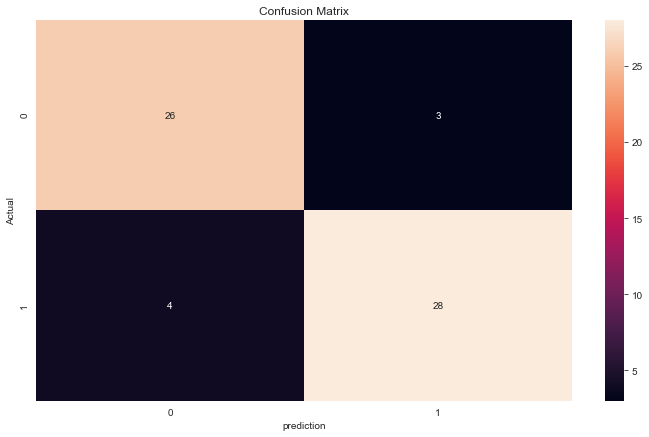

In [33]:
#Visualizing confusion matrix

plt.figure(figsize=(12,7))

plt.title('Confusion Matrix')

sns.heatmap(confusion_matrix, annot = True)

In [28]:
from sklearn.metrics import classification_report

report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

   micro avg       0.89      0.89      0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [29]:
lr.score(X_test, y_test)

0.8852459016393442

# Our model get 88% accuracy with Logistic Regression Algorithm.